In [1]:
# Import libraries

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



In [2]:
# Load Comments
comments = pd.read_csv("data/comments.csv", delimiter="\t", header=None, names=["EntryID", "PostID", "PostedBy", "SourceName", "SourceURL", "GeoX", "GeoY", "Timestamp", "Text", "NumImg", "ImgURL", "NumVideos", "VideosURL"])
print(comments.shape)
print(comments.head())

(3749891, 13)
                                             EntryID  \
0  e/ed12adf025b5491da54c4ff2c8c5377a/c/c2dbc8151...   
1  e/7f6fb13b5a99449bb9dcbb3f8693be73/c/7477fb677...   
2  e/624ca9226b6526ebdb69f9b46df482c7/c/32c6bf5bc...   
3  e/2fdf59e075094fe1847137af34eda0f7/c/eb22afe81...   
4  e/4d8de05f989d43a4b90bfbfc59751e1c/c/d472f7b81...   

                               PostID      PostedBy  SourceName  \
0  e/ed12adf025b5491da54c4ff2c8c5377a  koenigdublin         NaN   
1  e/7f6fb13b5a99449bb9dcbb3f8693be73  ilportalinux         NaN   
2  e/624ca9226b6526ebdb69f9b46df482c7    guardianuk         NaN   
3  e/2fdf59e075094fe1847137af34eda0f7          nahi  m.ctor.org   
4  e/4d8de05f989d43a4b90bfbfc59751e1c       miocaro         NaN   

                SourceURL GeoX GeoY            Timestamp  \
0                     NaN   \N   \N  2010-08-06 15:06:32   
1                     NaN   \N   \N  2010-08-06 15:06:32   
2                     NaN   \N   \N  2010-08-06 14:45:07   
3  htt

In [3]:
# Load Users
users = pd.read_csv("data/users.csv", delimiter="|", header=None, names=["ID", "Type", "Name", "ReservedField", "Description"], on_bad_lines='skip')
print(users.shape)
print(users.head())

(665382, 5)
                   ID  Type                       Name ReservedField  \
0               2gwsk  user                  Ming Quek      2a9209ad   
1              iroach  user                Isaac Roach      20948a19   
2           tonybraun  user                 Tony Braun      f68e8b26   
3  junknajidyahoocom1  user         Junknajid Yahoocom      98a02bb6   
4   spaceastronautics  user  Space & Astronautics News      c3178cfa   

                                         Description  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  NASA, ESA, NOAA, USGS, astronomy, space, weath...  


In [4]:
# Load Following
following = pd.read_csv("data/following.csv", delimiter="\t", header=None, names=["FollowedID", "FollowerID", "Timestamp"], on_bad_lines='skip')
print(following.shape)
print(following.head())

(19547158, 3)
      FollowedID      FollowerID                   Timestamp
0      njsinc4el    brendafranzo  2010-08-01 16:21:37.562726
1      njsinc4el       praguebob  2010-08-01 16:21:37.565893
2  zachhwilliams      hungheroic  2010-08-01 16:21:37.779807
3  zachhwilliams      ridwan2906  2010-08-01 16:21:37.780406
4  zachhwilliams  nickcodipietro  2010-08-01 16:21:37.780894


In [5]:
# Load Likes
likes = pd.read_csv("data/likes.csv", delimiter="\t", header=None, names=["userID", "PostID", "Timestamp"], on_bad_lines='skip')
print(likes.shape)
print(likes.head())

(798112, 3)
             userID                              PostID            Timestamp
0           yasinde  e/2d4fcaed2d2a4ac1a36571b66da3f16c  2010-04-28 07:17:43
1  socialnewsturkey  e/2d4fcaed2d2a4ac1a36571b66da3f16c  2010-03-02 20:10:02
2             janzu  e/2d4fcaed2d2a4ac1a36571b66da3f16c  2010-03-02 19:50:57
3        mugecerman  e/2d4fcaed2d2a4ac1a36571b66da3f16c  2010-03-02 19:18:38
4           miocaro  e/2d4fcaed2d2a4ac1a36571b66da3f16c  2010-03-02 17:31:31


In [6]:
# Load Entries/Posts
entries1 = pd.read_csv("data/entries1.csv", delimiter="\t", header=None, names=["PostID", "PostedBy", "SourceName", "SourceURL", "GeoX", "GeoY", "Timestamp", "Text", "NumImg", "ImgURL", "NumVideos", "VideosURL"], on_bad_lines='skip')
entries2 = pd.read_csv("data/entries2.csv", delimiter="\t", header=None, names=["PostID", "PostedBy", "SourceName", "SourceURL", "GeoX", "GeoY", "Timestamp", "Text", "NumImg", "ImgURL", "NumVideos", "VideosURL"], on_bad_lines='skip')
entries3 = pd.read_csv("data/entries3.csv", delimiter="\t", header=None, names=["PostID", "PostedBy", "SourceName", "SourceURL", "GeoX", "GeoY", "Timestamp", "Text", "NumImg", "ImgURL", "NumVideos", "VideosURL"], on_bad_lines='skip')
entries = pd.concat([entries1, entries2, entries3], ignore_index=True)
print(entries.shape)
print(entries.head())


(12450658, 12)
                               PostID     PostedBy             SourceName  \
0  e/29af803d670fb8d67692095f3ee623e6    newsroom1  Ottawa Citizen - News   
1  e/9c8413a376bec6389be4d46d0812c2bb  mehmetinnet           Mehmetin.Net   
2  e/2d658d97842a466a9513f587f85b0e59  mehmetergin           Mehmetin.Net   
3  e/b269ab5d56be4e5e90c1954ecc1ef63a       afriki                    NaN   
4  e/74f0a50c374a4ad6bddcbcc60c60cad9     hamsafar                    NaN   

                                 SourceURL GeoX GeoY            Timestamp  \
0  http://www.ottawacitizen.com/index.html   \N   \N  2010-08-02 18:43:10   
1                  http://www.mehmetin.net   \N   \N  2010-08-02 19:15:52   
2                 http://www.mehmetin.net/   \N   \N  2010-08-02 19:15:52   
3                                      NaN   \N   \N  2010-08-02 16:37:57   
4                                      NaN   \N   \N  2010-08-02 18:54:39   

                                                Text  NumIm

In [7]:
# Remove people with no followers and who are not following anyone and don't post anything and don't comment or like anything

print("Identifying all active users...")
followers = set(following['FollowerID'].unique())
followed = set(following['FollowedID'].unique())
posters = set(entries['PostedBy'].unique())
commenters = set(comments['PostedBy'].unique())
likers = set(likes['userID'].unique())

active_user_ids = followers.union(followed, posters, commenters, likers)
print(f"Found {len(active_user_ids)} active users.")

num_users_before = users.shape[0]
print(f"Users before filtering: {num_users_before}")

users_filtered = users[users['ID'].isin(active_user_ids)]
num_users_after = users_filtered.shape[0]

print(f"Removed {num_users_before - num_users_after} completely inactive users.")
print(f"Users after filtering: {num_users_after}")


print("Ensuring data consistency across all files...")
entries_filtered = entries[entries['PostedBy'].isin(users_filtered['ID'])]
comments_filtered = comments[comments['PostedBy'].isin(users_filtered['ID'])]
likes_filtered = likes[likes['userID'].isin(users_filtered['ID'])]
following_filtered = following[(following['FollowedID'].isin(users_filtered['ID'])) & (following['FollowerID'].isin(users_filtered['ID']))]

# confirm that comments, likes, entries and following have the same dimension as before since we only removed "dead" users who don't appear in any of these files
print(f"Entries before: {entries.shape}, after: {entries_filtered.shape}")
print(f"Comments before: {comments.shape}, after: {comments_filtered.shape}")
print(f"Likes before: {likes.shape}, after: {likes_filtered.shape}")
print(f"Following before: {following.shape}, after: {following_filtered.shape}")

print("Saving filtered data...")
users_filtered.to_csv("data/filtered_users.csv", index=False)
comments_filtered.to_csv("data/filtered_comments.csv", index=False)
likes_filtered.to_csv("data/filtered_likes.csv", index=False)
entries_filtered.to_csv("data/filtered_entries.csv", index=False)
following_filtered.to_csv("data/filtered_following.csv", index=False)

print("✅ Filtered data saved successfully.")


Identifying all active users...
Found 548206 active users.
Users before filtering: 665382
Removed 157473 completely inactive users.
Users after filtering: 507909
Ensuring data consistency across all files...
Entries before: (12450658, 12), after: (10955960, 12)
Comments before: (3749891, 13), after: (2867787, 13)
Likes before: (798112, 3), after: (540930, 3)
Following before: (19547158, 3), after: (18477145, 3)
Saving filtered data...
✅ Filtered data saved successfully.


In [8]:


def print_stats(data_series, description):
    """Calculates and prints key statistics for a pandas Series."""
    print(f"--- {description} ---")
    if data_series.empty:
        print("No data available to calculate statistics.\n")
        return
    print(f"Average: {data_series.mean():.2f}")
    print(f"Median: {data_series.median():.2f}")
    print(f"Standard Deviation: {data_series.std():.2f}")
    print(f"Min: {data_series.min()}")
    print(f"Max: {data_series.max()}")
    print("-" * (len(description) + 8) + "\n")

# --- Follower Count ---
follower_count = following['FollowedID'].value_counts()
print_stats(follower_count, "Follower Count per User")

# --- Following Count ---
following_count = following['FollowerID'].value_counts()
print_stats(following_count, "Following Count per User")

# --- Posts Created ---
posts_created = entries['PostedBy'].value_counts()
print_stats(posts_created, "Posts Created per User")

# --- Likes Received per Post ---
likes_per_post = likes.groupby('PostID').size().rename('LikesCount')
posts_with_likes = entries.merge(likes_per_post, on='PostID', how='left')
posts_with_likes['LikesCount'] = posts_with_likes['LikesCount'].fillna(0)
avg_likes_received = posts_with_likes.groupby('PostedBy')['LikesCount'].mean()
print_stats(avg_likes_received, "Likes Received per Post per User")

# --- Likes Given ---
likes_given = likes['userID'].value_counts()
print_stats(likes_given, "Likes Given per User")

# --- Comments Received per Post ---
comments_per_post = comments.groupby('PostID').size().rename('CommentsCount')
posts_with_comments = entries.merge(comments_per_post, on='PostID', how='left')
posts_with_comments['CommentsCount'] = posts_with_comments['CommentsCount'].fillna(0)
avg_comments_received = posts_with_comments.groupby('PostedBy')['CommentsCount'].mean()
print_stats(avg_comments_received, "Comments Received per Post per User")

# --- Comments Given ---
comments_given = comments['PostedBy'].value_counts()
print_stats(comments_given, "Comments Given per User")

--- Follower Count per User ---
Average: 96.70
Median: 20.00
Standard Deviation: 380.44
Min: 1
Max: 43222
-------------------------------

--- Following Count per User ---
Average: 43.04
Median: 4.00
Standard Deviation: 534.28
Min: 1
Max: 74522
--------------------------------

--- Posts Created per User ---
Average: 48.53
Median: 8.00
Standard Deviation: 433.89
Min: 1
Max: 166965
------------------------------

--- Likes Received per Post per User ---
Average: 0.04
Median: 0.00
Standard Deviation: 0.63
Min: 0.0
Max: 180.71428571428572
----------------------------------------

--- Likes Given per User ---
Average: 34.89
Median: 3.00
Standard Deviation: 213.05
Min: 1
Max: 25224
----------------------------

--- Comments Received per Post per User ---
Average: 0.20
Median: 0.00
Standard Deviation: 1.69
Min: 0.0
Max: 279.1518987341772
-------------------------------------------

--- Comments Given per User ---
Average: 69.38
Median: 4.00
Standard Deviation: 339.45
Min: 1
Max: 29348
------

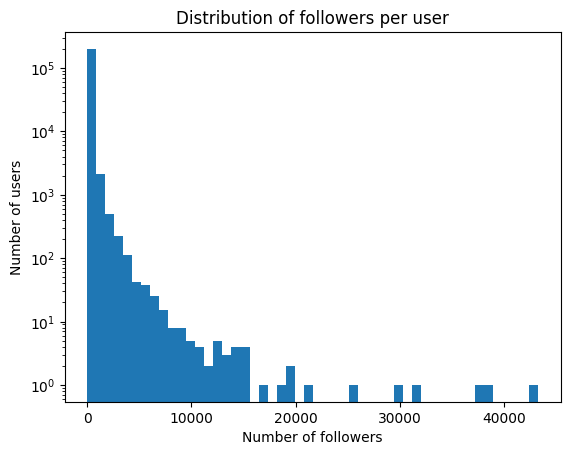

Most followed users:
FollowedID
mashable           43222
leolaporte         38260
barackobama        37400
kevinrose          31696
veronicabelmont    29441
Name: count, dtype: int64


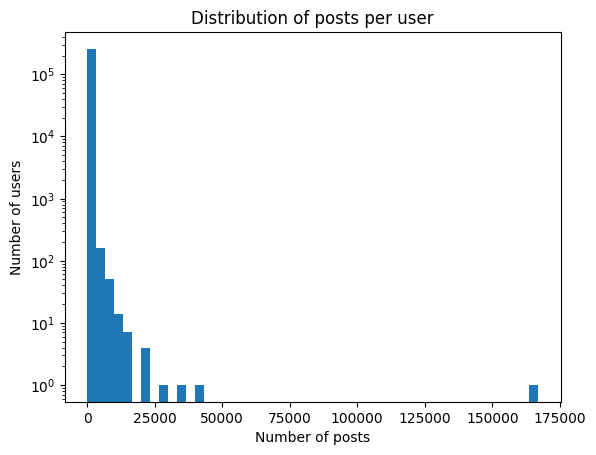

Most active users:
PostedBy
musiclion          166965
jairmorselli        40377
twibfeed            35411
sidepodcastlive     29351
newbook             22878
Name: count, dtype: int64


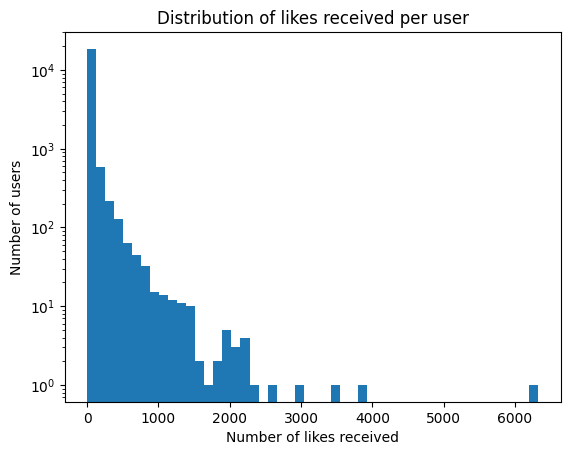

Users with most likes received:
PostedBy
jade0307      6325
mimyusof      3907
ciaotokio     3492
conformist    3036
flo14wer      2644
dtype: int64


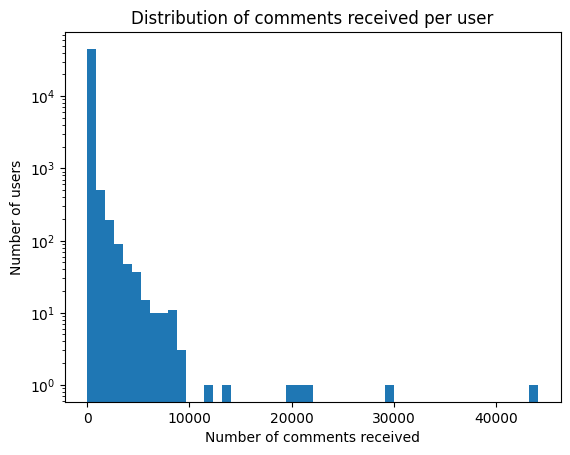

Users with most comments received:
PostedBy_poster
moni81             44106
sidepodcastlive    29348
miladabadan        21344
aynebilim          20312
wishiwerel33t      19619
dtype: int64


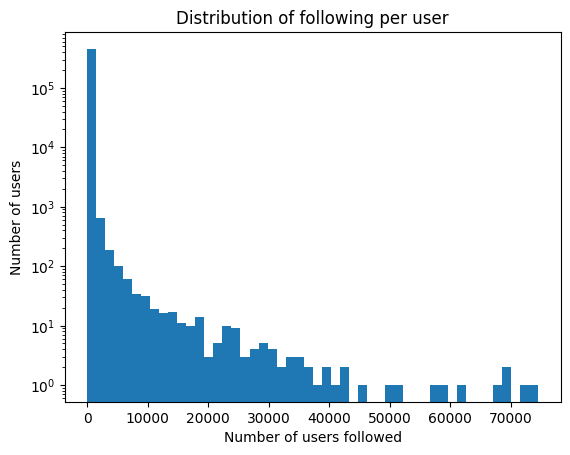

Users who follow the most other users:
FollowerID
br3adman        74522
malikimran      72064
malikimrana1    69649
sonergonul      68620
phasuk111       67414
Name: count, dtype: int64


In [9]:
# Create some plots

# Followers per user
most_followed = following['FollowedID'].value_counts()
plt.hist(most_followed, bins=50)
plt.yscale('log')
plt.xlabel('Number of followers')
plt.ylabel('Number of users')
plt.title('Distribution of followers per user')
plt.savefig('results/followers_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Most followed users:")
print(most_followed.head(5))

# Posts per user
most_active = entries['PostedBy'].value_counts()
plt.hist(most_active, bins=50)
plt.yscale('log')
plt.xlabel('Number of posts')
plt.ylabel('Number of users')
plt.title('Distribution of posts per user')
plt.savefig('results/posts_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Most active users:")
print(most_active.head(5))

# Likes received per user
likes_received = likes.merge(entries, on='PostID').groupby('PostedBy').size().sort_values(ascending=False)
plt.hist(likes_received, bins=50)
plt.yscale('log')
plt.xlabel('Number of likes received')
plt.ylabel('Number of users')
plt.title('Distribution of likes received per user')
plt.savefig('results/likes_received_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Users with most likes received:")
print(likes_received.head(5))

# Comments received per user
comments_entries_merged = comments.merge(entries, on='PostID', suffixes=('_commenter', '_poster'))
comments_received = comments_entries_merged.groupby('PostedBy_poster').size().sort_values(ascending=False)
plt.hist(comments_received, bins=50)
plt.yscale('log')
plt.xlabel('Number of comments received')
plt.ylabel('Number of users')
plt.title('Distribution of comments received per user')
plt.savefig('results/comments_received_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Users with most comments received:")
print(comments_received.head(5))

# Following per user
most_following = following['FollowerID'].value_counts()
plt.hist(most_following, bins=50)
plt.yscale('log')
plt.xlabel('Number of users followed')
plt.ylabel('Number of users')
plt.title('Distribution of following per user')
plt.savefig('results/following_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Users who follow the most other users:")
print(most_following.head(5))

